# Basic introduction to SymPy - a symbolic computation package in Python
SymPy is a Python library for symbolic computation. It provides computer algebra capabilities either as a standalone application, as a library to other applications, or live on the web as SymPy Live or SymPy Gamma.  

SymPy is trivial to install and to inspect because it is written entirely in Python with few dependencies. This ease of access combined with a simple and extensible code base in a well known language make SymPy a computer algebra system with a relatively low barrier to entry. 

SymPy includes features ranging from basic symbolic arithmetic to calculus, algebra, geometry, linear algebra, discrete mathematics and even classical mechanics/

quantum physics. It is capable of formatting the result of the computations as LaTeX code.

In [1]:
from sympy import *

## Symbols and substitution

### Initialize new symbols

In [2]:
from sympy import *
x, y, z = symbols("x y z")

### Create a new (symbolic) variable _expr_

In [3]:
expr = cos(x) + 1

### Now substitute _x_ by _y_

In [4]:
expr.subs(x, y)

cos(y) + 1

### Evaluate the expression at a point - say at _x = 0_. We expect cos(_0_)+_1_=_2_

In [5]:
expr.subs(x, 0)

2

### To perform multiple substitutions at once, pass a list of `(symbol, value)` pairs to `subs`. 
### Say we want to evaluate $\frac{x^3+4.x.y}{z^2+6}$ at $(2,4,1)$

In [6]:
expr = (x**3 + 4*x*y)/(z**2+6)
expr.subs([(x, 2), (y, 4), (z, 1)])

40/7

### And the best part - converting a Python string to a SymPy symbol object with one simple function: `sympify()`

In [7]:
str_expr = "x**2 + 3*x - 1/2"
expr = sympify(str_expr)
x**2 + 3*x - 1/2
expr.subs(x, 2)

19/2

## Pretty printing
There are several printers available in SymPy. The most common ones are: 
* str, srepr, 
* ASCII pretty printer, Unicode pretty printer
* LaTeX, MathML
* Dot

If all you want is the best pretty printing, use the __`init_printing()`__ function. This will automatically enable the best printer available in your environment.
### Before enabling pretty printing, symbolic expressions look ...er.. ordinary :-)

In [8]:
expr=sin(x+2*y)+((x**2+2)/(2*y*z+3))+log(1/(1+3*x))
expr

(x**2 + 2)/(2*y*z + 3) + log(1/(3*x + 1)) + sin(x + 2*y)

### After enabling pretty printing, they look fantastic!

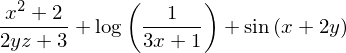

In [9]:
init_printing()
expr

#### SymPy can handle the beautiful integrals too!

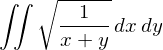

In [10]:
Integral(sqrt(1/(x+y)),x,y)

## Simplification of mathematical expressions
### `simplify()`
In general, __`simplify()`__ can be tried for mathemetical simplification but it can be unnecessarily slow, since it tries many kinds of simplifications before picking the best one. If you already know exactly what kind of simplification you are after, it is better to apply the specific simplification function(s) that apply those simplifications.

In [11]:
expr=sin(x)**2 + cos(x)**2
expr

In [12]:
simplify(expr)

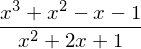

In [13]:
expr=(x**3 + x**2 - x - 1)/(x**2 + 2*x + 1)
expr

In [14]:
simplify(expr)

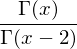

In [15]:
expr=gamma(x)/gamma(x - 2)
expr

In [16]:
simplify(expr)

### `expand()`
Given a polynomial, `expand()` will put it into a canonical form of a sum of monomials.

In [17]:
expand((x+2*y)**3)

In [18]:
expand((x + 1)*(x - 2) - (x - 1)*x)

### `factor()`
`factor` takes a polynomial and factors it into irreducible factors over the rational numbers.

In [19]:
expr=(x**3 - x**2 + x - 1)
expr

In [20]:
factor(expr)

### ` collect()`
`collect()` collects common powers of a term in an expression.

In [21]:
expr = x*y + x - 3 + 2*x**2 - z*x**2 + x**3
expr

In [22]:
collect(expr,x)

### `cancel()`
`cancel()` will take any rational function and put it into the standard canonical form, $\frac{p}{q}$, where $p$ and $q$ are expanded polynomials with no common factors, and the leading coefficients of $p$ and $q$ do not have denominators (i.e., are integers).

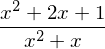

In [23]:
expr=(x**2 + 2*x + 1)/(x**2 + x)
expr

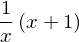

In [24]:
cancel(expr)

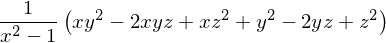

In [25]:
expr=(x*y**2 - 2*x*y*z + x*z**2 + y**2 - 2*y*z + z**2)/(x**2 - 1)
expr

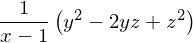

In [26]:
cancel(expr)

### `apart()`
`apart()` performs a partial fraction decomposition on a rational function.

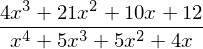

In [27]:
expr = (4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x)
expr

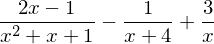

In [28]:
apart(expr)

### `trigsimp()`
To simplify expressions using trigonometric identities, use `trigsimp()`.

In [29]:
expr=(sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4)
expr

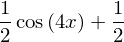

In [30]:
trigsimp(expr)

In [31]:
expr=cosh(x)**2 + sinh(x)**2
expr

In [32]:
trigsimp(expr)

### `expand_trig()`
To expand trigonometric functions, that is, apply the sum or double angle identities, use `expand_trig()`.

In [33]:
expand_trig(sin(x + y))

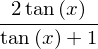

In [34]:
simplify(expand_trig(tan(2*x))*(1-tan(x)))

### Exponent related simplifications
`powersimp()`,`expand_power_exp()`,`expand_power_base()`,`powdenest()` are used for various exponent related simplification tasks.

In [35]:
x, y = symbols('x y', positive=True)
a, b = symbols('a b', real=True)
z, t, c = symbols('z t c')

In [36]:
powsimp(x**a*x**b)

In [37]:
powsimp(x**a*y**a)

In [38]:
sqrt(powsimp(x**a*x**b))

In [39]:
x**(a+b)

In [40]:
expand_power_exp(x**(a+b))

In [41]:
expand_power_base((x**a)**b)

### Logarithm
Main logarithm identities are:<br>
$$log(xy)=log(x)+log(y)$$
$$log(x^n)=n.log(x)$$<br>
Neither identity is true for arbitrary complex $x$ and $y$, due to the branch cut in the complex plane for the complex logarithm. However, sufficient conditions for the identities to hold are if $x$ and $y$ are positive and $n$ is real. SymPy respects this and refuses to do simplification if true nature of variables are not declared. Two main functions are `expand_log()` and `logcombine()`.

In [42]:
x, y = symbols('x y', positive=True)
n = symbols('n', real=True)

In [43]:
expand_log(log((3*x**2)*(2*y**3)))

In [44]:
expand_log(log(z*t)) #Remember, z and t are not declared as positive

In [45]:
expand_log(log(z*t),force=True) # However, you can set force=True if you are sure about what you are doing

In [46]:
logcombine(n*2*log(x))

In [47]:
logcombine(n*2*log(x)+3*log(y))

## Special functions
SymPy implements dozens of special functions, ranging from functions in combinatorics to mathematical physics. An extensive list of the special functions included with SymPy and their documentation is at the <a href="http://docs.sympy.org/latest/modules/functions/index.html#functions-contents">Functions Module</a> page. We ony show some basic important functions here,

In [48]:
x, y, z = symbols('x y z')
k, m, n = symbols('k m n')

### Factorial

In [49]:
factorial(n)

### Binomial coefficient

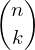

In [50]:
binomial(n,k)

### Gamma function

In [51]:
gamma(z)

### Generalized hypergeometric function

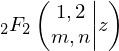

In [52]:
hyper([1,2],[m,n],z)

### Fibonaci

In [53]:
for x in range(5,11):
    print(f"Fibonacci({x}):",fibonacci(x))

Fibonacci(5): 5
Fibonacci(6): 8
Fibonacci(7): 13
Fibonacci(8): 21
Fibonacci(9): 34
Fibonacci(10): 55


### Harmonic
`harmonic(n)` gives the $n^{th}$ harmonic number, $\mathbf{H_n}=1+\frac{1}{2}+\frac{1}{3}+...+\frac{1}{n}$<br>
`harmonic(n,m)` gives the $n^{th}$ generalized harmonic number of order $m$, $\mathbf{H_{n,m}}=\sum_{1}^{k=n}\frac{1}{k^m}$

In [54]:
harmonic(3)

### Error function

In [55]:
erf(2)

In [56]:
erfi(2*I+3)

In [57]:
# We can numerically evaluate the imaginary error function to arbitrary precision on the whole complex plane:
erfi(-2*I+2.3).evalf(2.2)

In [58]:
simplify(erfinv(erf(z+2)))

## Fun with Continued Fraction

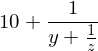

In [59]:
def list_to_frac(lst):
    expr = Integer(0)
    for i in reversed(lst[1:]):
        expr += i
        expr = 1/expr
    return lst[0] + expr

list_to_frac([x, y, z])

In [60]:
list_to_frac([1, 2, 3, 4])

In [61]:
syms = symbols('a0:5')

In [62]:
syms

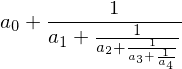

In [63]:
frac=list_to_frac(syms)
frac

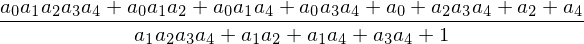

In [64]:
cancel(frac)